<a href="https://colab.research.google.com/github/Y-Srivaishnavi/ais2101_int_sys/blob/main/assignment3/exercise2/TSP_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Subsetting the Data

In [ ]:
djib_subset = np.array([
[12058.333300, 42195.555600],
[12149.444400,42477.500000],
[12286.944400, 43355.555600],
[12300.000000, 42433.333300],
[12355.833300, 43156.388900],
[12363.333300, 43189.166700],
[12372.777800, 42711.388900],
[12386.666700, 43334.722200],
[12421.666700, 42895.555600],
[12645.000000, 42973.333300]])

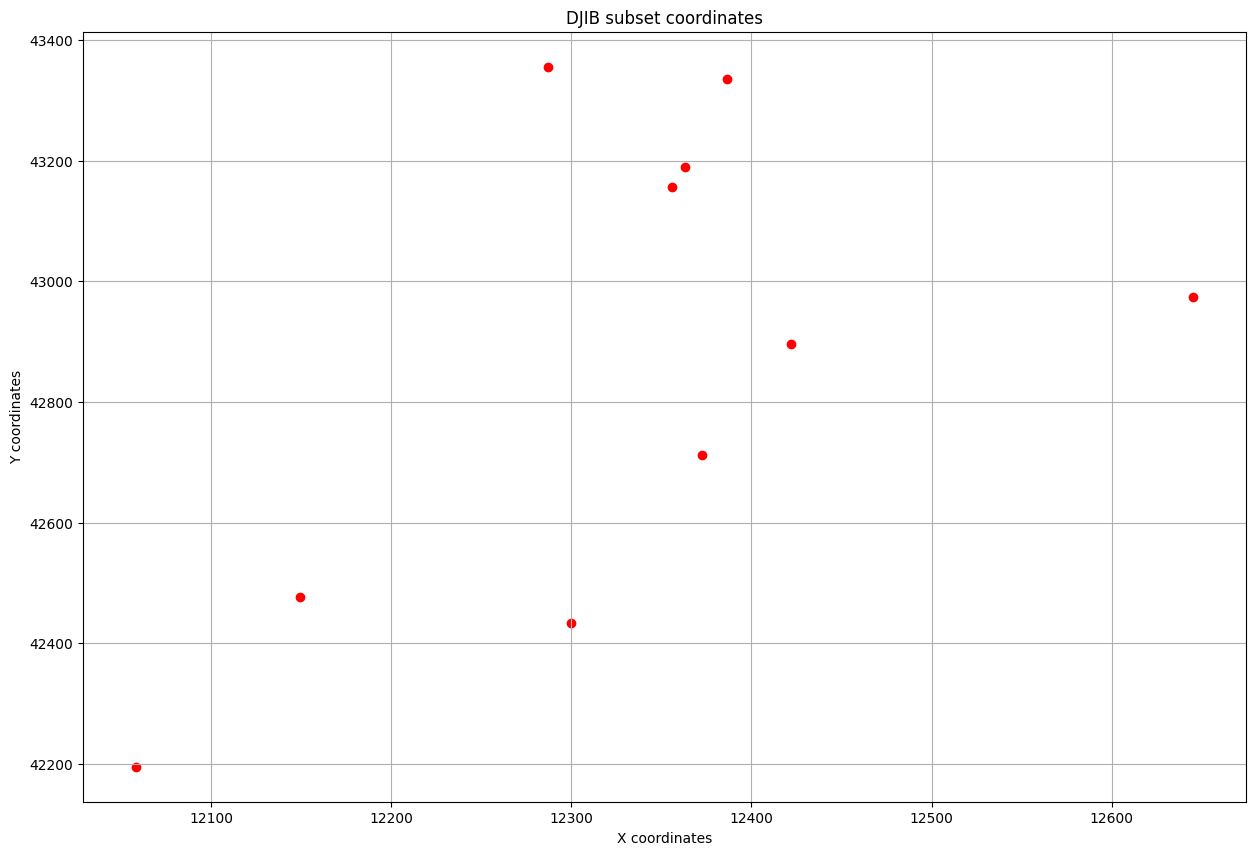

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(djib_subset[:, 0], djib_subset[:, 1], label='DJIB', color='red')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.title("DJIB subset coordinates")
plt.grid(True)
plt.show()

In [ ]:
djib = np.array([[11003.611100, 42102.500000],
 [11108.611100, 42373.888900],
 [11133.333300, 42885.833300],
 [11155.833300, 42712.500000],
 [11183.333300, 42933.333300],
 [11297.500000, 42853.333300],
 [11310.277800, 42929.444400],
 [11416.666700, 42983.333300],
 [11423.888900, 43000.277800],
 [11438.333300, 42057.222200],
 [11461.111100, 43252.777800],
 [11485.555600, 43187.222200],
 [11503.055600, 42855.277800],
 [11511.388900, 42106.388900],
 [11522.222200, 42841.944400],
 [11569.444400, 43136.666700],
 [11583.333300, 43150.000000],
 [11595.000000, 43148.055600],
 [11600.000000, 43150.000000],
 [11690.555600, 42686.666700],
 [11715.833300, 41836.111100],
 [11751.111100, 42814.444400],
 [11770.277800, 42651.944400],
 [11785.277800, 42884.444400],
 [11822.777800, 42673.611100],
 [11846.944400, 42660.555600],
 [11963.055600, 43290.555600],
 [11973.055600, 43026.111100],
 [12058.333300, 42195.555600],
 [12149.444400, 42477.500000],
 [12286.944400, 43355.555600],
 [12300.000000, 42433.333300],
 [12355.833300, 43156.388900],
 [12363.333300, 43189.166700],
 [12372.777800, 42711.388900],
 [12386.666700, 43334.722200],
 [12421.666700, 42895.555600],
 [12645.000000, 42973.333300]]
)

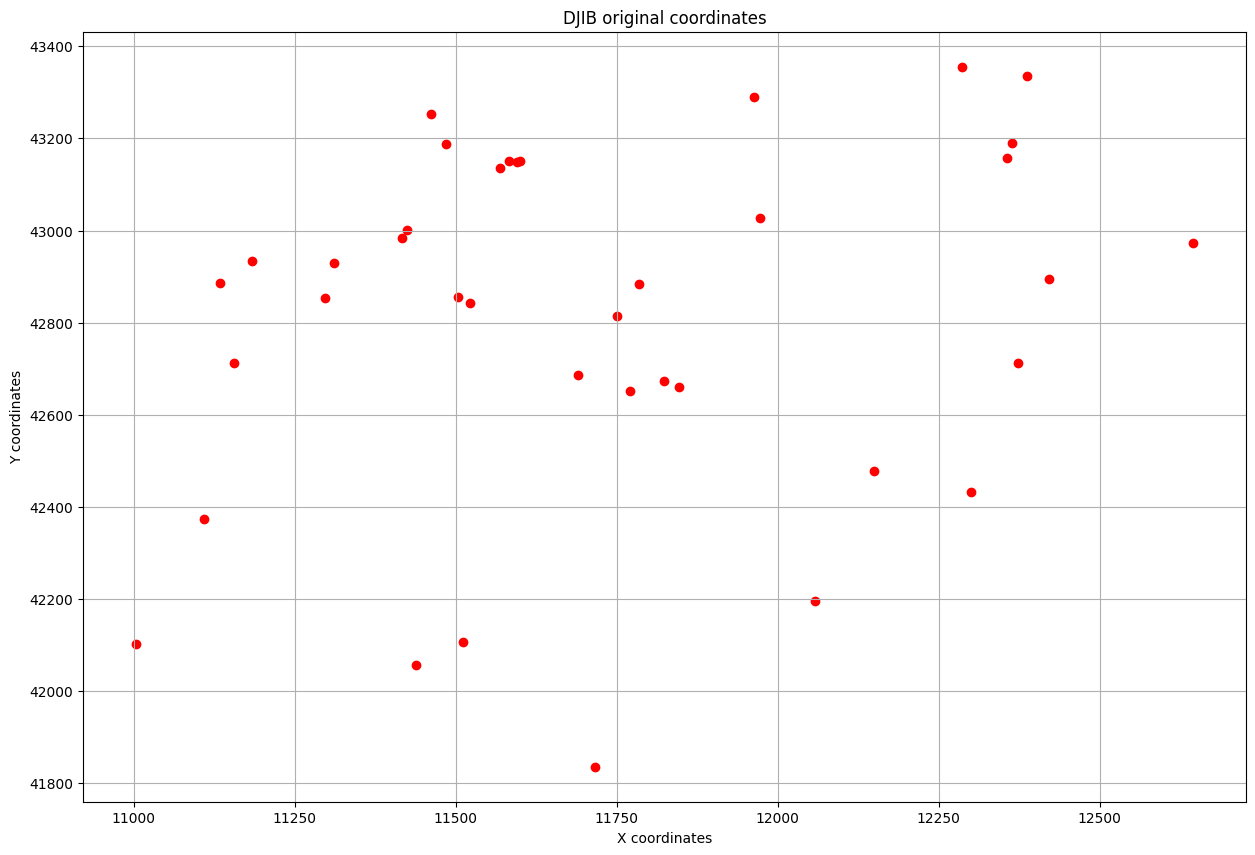

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(djib[:, 0], djib[:, 1], label='DJIB', color='red')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.title("DJIB original coordinates")
plt.grid(True)
plt.show()

# PSO

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, num_cities):
        self.position = np.random.permutation(num_cities)
        self.best_position = np.copy(self.position)
        self.velocity = []  # List of swaps
        self.best_cost = float('inf')

def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def calculate_cost(route, coordinates):
    return sum(euclidean_distance(coordinates[route[i-1]], coordinates[route[i]]) for i in range(len(route)))

def swap_operator(route, swap):
    new_route = np.copy(route)
    new_route[swap[0]], new_route[swap[1]] = new_route[swap[1]], new_route[swap[0]]
    return new_route

def apply_velocity(route, velocity):
    new_route = np.copy(route)
    for swap in velocity:
        new_route = swap_operator(new_route, swap)
    return new_route

def pso_tsp(coordinates, num_particles=10, max_iters=100, w=0.5, c1=1.5, c2=1.5):
    num_cities = len(coordinates)
    swarm = [Particle(num_cities) for _ in range(num_particles)]
    global_best = None
    global_best_cost = float('inf')
    convergence = []

    for particle in swarm:
        cost = calculate_cost(particle.position, coordinates)
        particle.best_cost = cost
        if cost < global_best_cost:
            global_best = np.copy(particle.position)
            global_best_cost = cost

    for _ in range(max_iters):
        for particle in swarm:
            new_velocity = []
            if random.random() < w:  # Inertia influence
                new_velocity.extend(particle.velocity)
            if random.random() < c1:  # Cognitive component
                swap = (random.randint(0, num_cities - 1), random.randint(0, num_cities - 1))
                new_velocity.append(swap)
            if random.random() < c2:  # Social component
                swap = (random.randint(0, num_cities - 1), random.randint(0, num_cities - 1))
                new_velocity.append(swap)

            particle.velocity = new_velocity
            new_position = apply_velocity(particle.position, particle.velocity)
            new_cost = calculate_cost(new_position, coordinates)

            if new_cost < particle.best_cost:
                particle.best_cost = new_cost
                particle.best_position = np.copy(new_position)

            if new_cost < global_best_cost:
                global_best_cost = new_cost
                global_best = np.copy(new_position)

            particle.position = new_position

        convergence.append(global_best_cost)  # Store cost per iteration

    return global_best, global_best_cost, convergence

Best Route: [2 5 4 7 1 0 3 6 8 9]
Best Cost: 3160.6515549936275


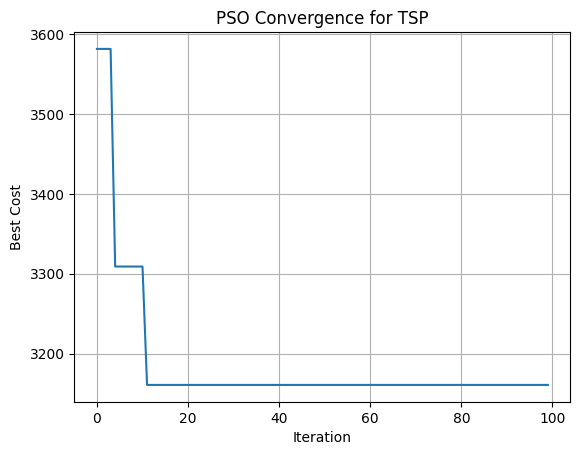

Best Route: [8 9 4 5 7 2 6 3 1 0]
Best Cost: 3040.8007258836583


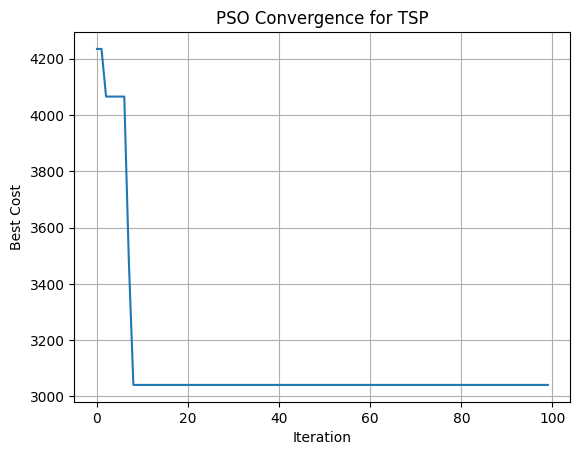

Best Route: [4 6 3 0 1 8 9 5 2 7]
Best Cost: 2924.230837749595


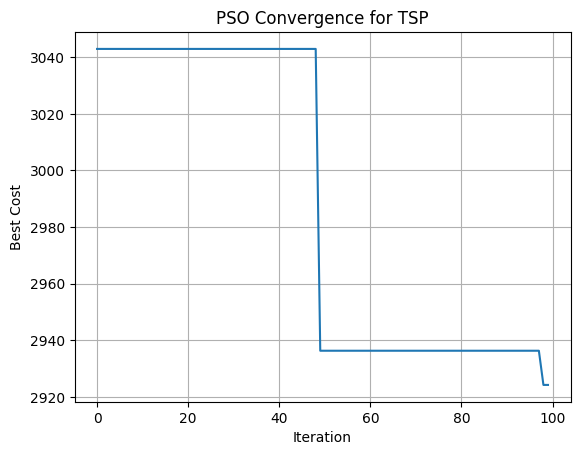

Best Route: [9 7 2 4 5 0 3 1 6 8]
Best Cost: 3076.1960748288307


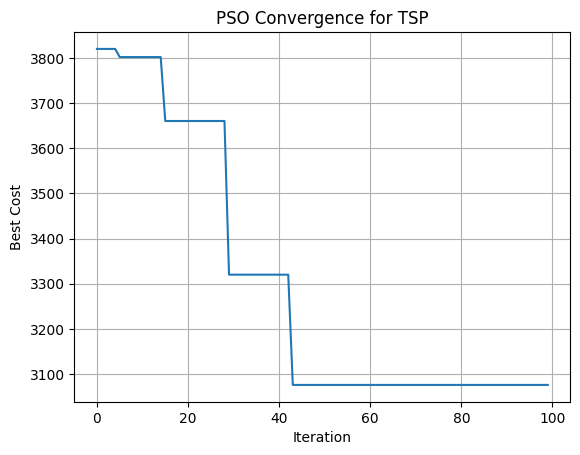

Best Route: [3 6 8 4 7 2 5 9 0 1]
Best Cost: 2995.1998676141807


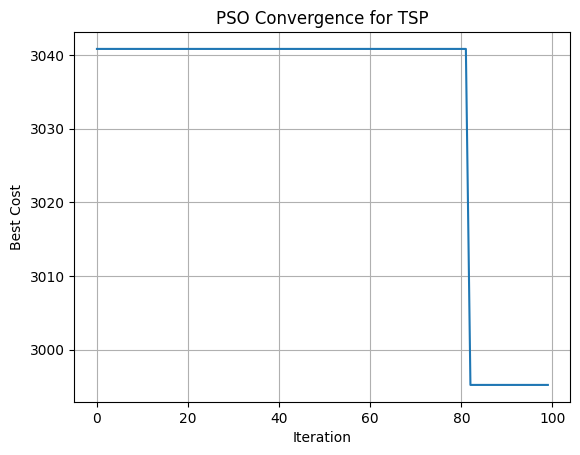

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)

  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [0 1 6 8 4 7 2 5 9 3]
Best Cost: 2879.8725421908875


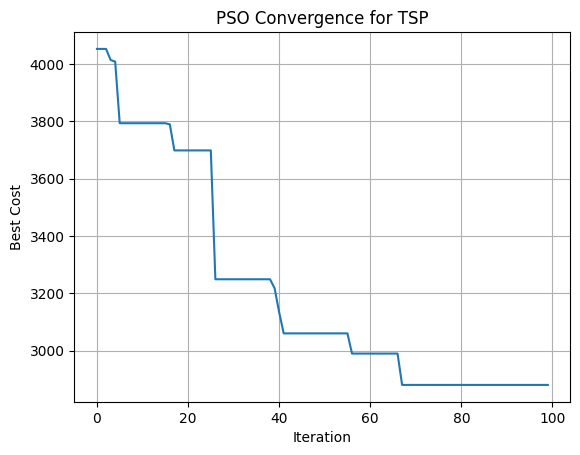

Best Route: [2 4 7 8 6 3 0 1 9 5]
Best Cost: 3184.5359528568997


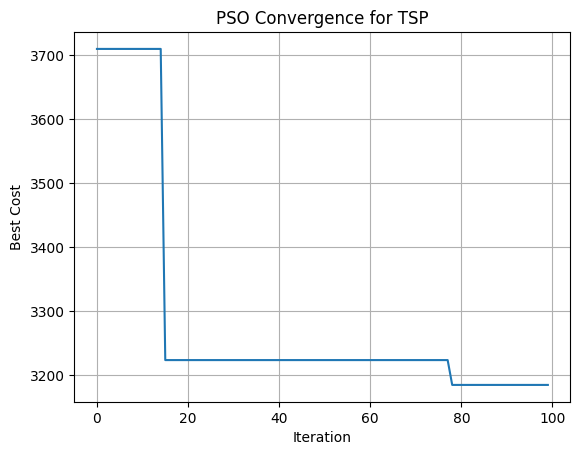

Best Route: [0 1 3 9 2 4 7 5 8 6]
Best Cost: 3250.885972163008


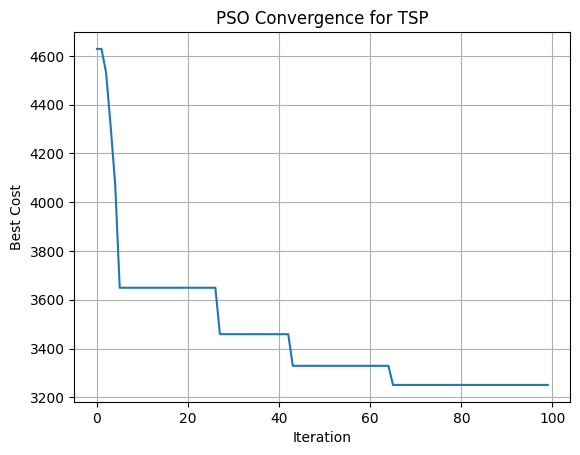

Best Route: [4 9 6 1 3 0 8 2 7 5]
Best Cost: 3090.2548995312172


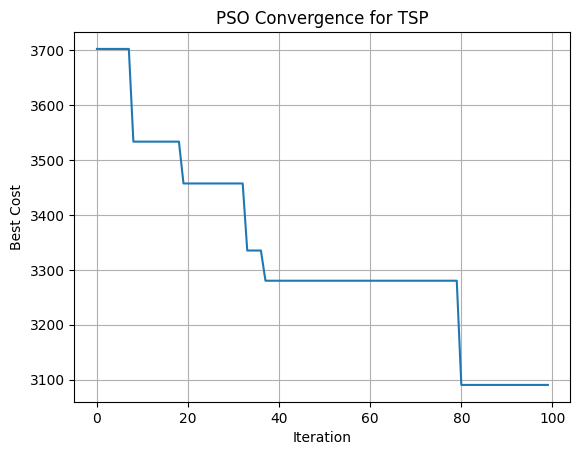

Best Route: [9 1 0 3 6 2 4 7 5 8]
Best Cost: 3348.6060002197487


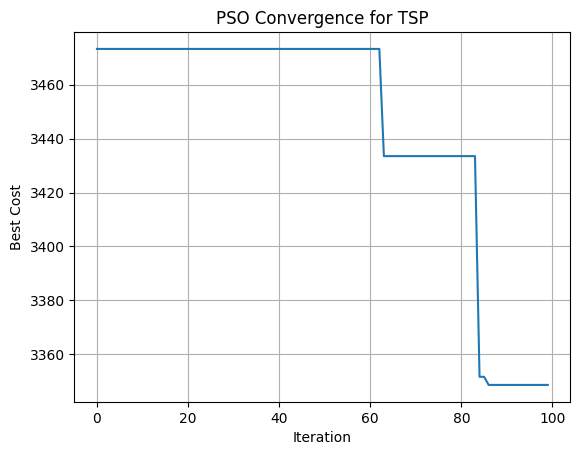

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, w=0)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)

  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [9 8 7 2 5 4 0 1 3 6]
Best Cost: 3119.876457581581


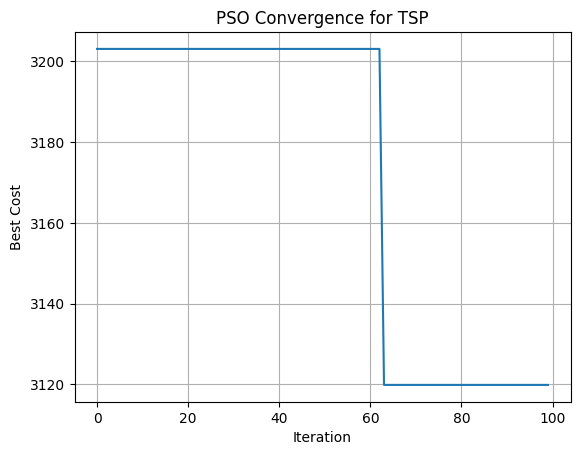

Best Route: [7 5 4 1 0 3 6 8 9 2]
Best Cost: 2866.002762296906


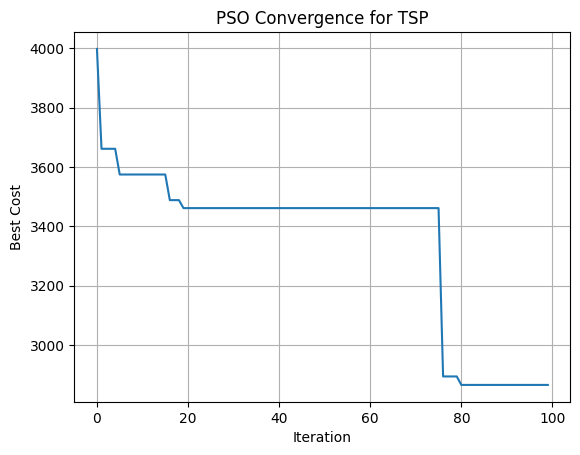

Best Route: [1 0 6 8 5 4 2 7 9 3]
Best Cost: 2978.4861477742725


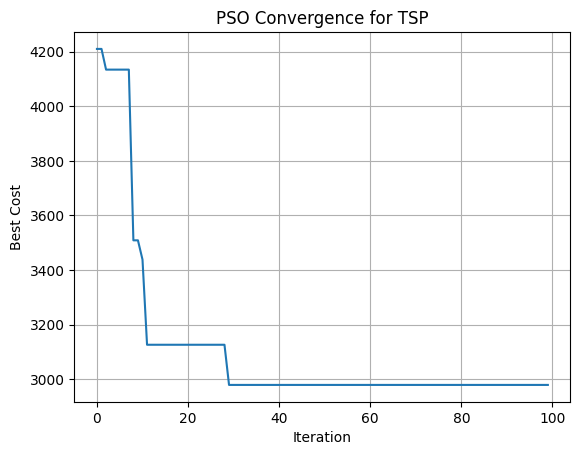

Best Route: [3 0 1 5 7 2 4 9 8 6]
Best Cost: 2895.1712117763695


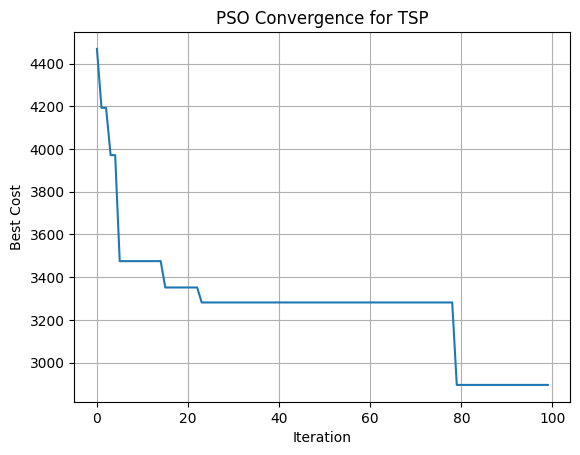

Best Route: [5 7 2 4 8 6 1 0 3 9]
Best Cost: 2873.965160105948


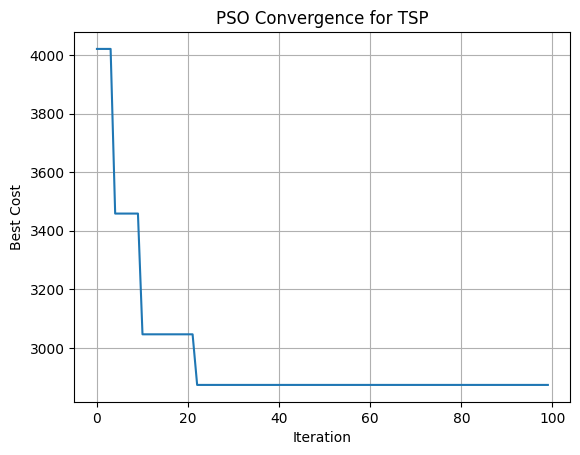

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, w=1)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)

  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [5 8 9 1 0 3 6 4 2 7]
Best Cost: 3064.9644892941856


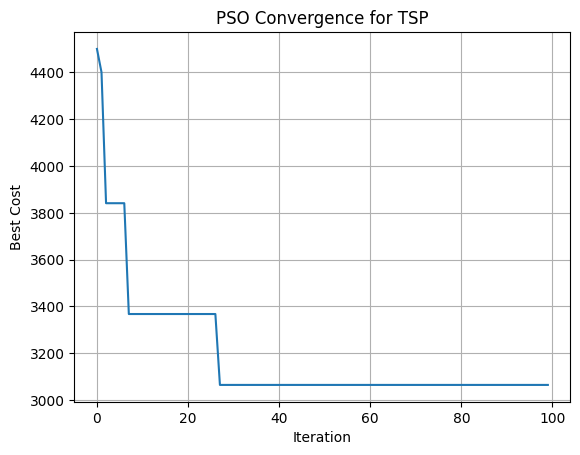

Best Route: [3 0 1 6 9 5 2 4 7 8]
Best Cost: 3184.6912858768146


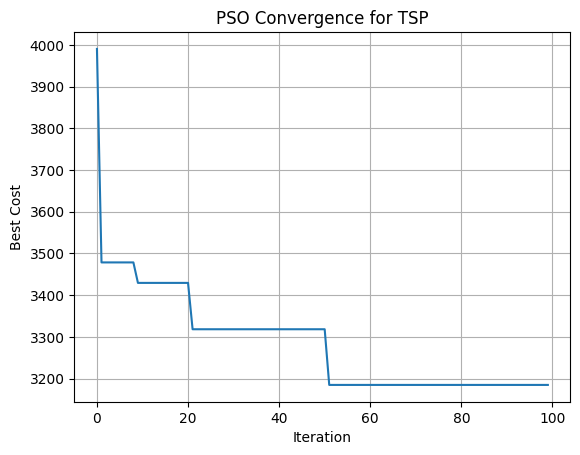

Best Route: [8 1 0 3 6 9 7 2 4 5]
Best Cost: 2889.2303936547705


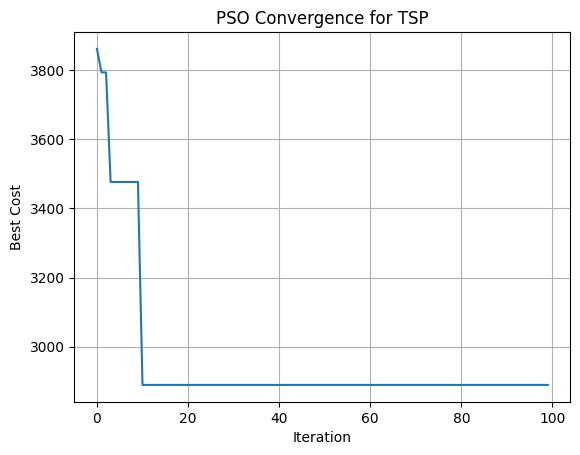

Best Route: [6 1 0 3 8 5 7 2 4 9]
Best Cost: 2916.0912501361404


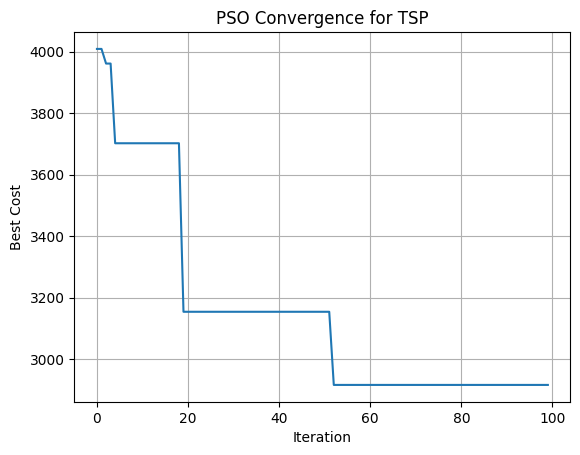

Best Route: [1 6 9 5 4 7 2 8 3 0]
Best Cost: 2965.12472837942


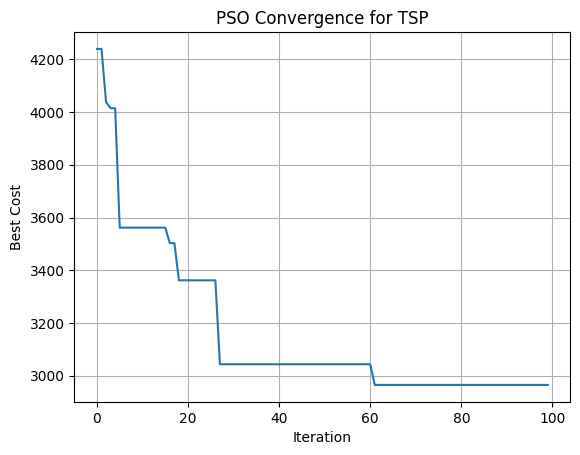

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, w=1.5)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [2 7 5 4 9 6 3 0 1 8]
Best Cost: 2903.8834032268724


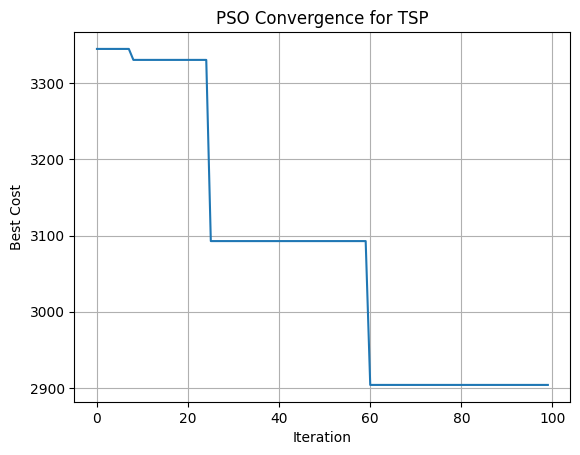

Best Route: [7 2 5 3 0 1 6 8 9 4]
Best Cost: 2952.4160243499928


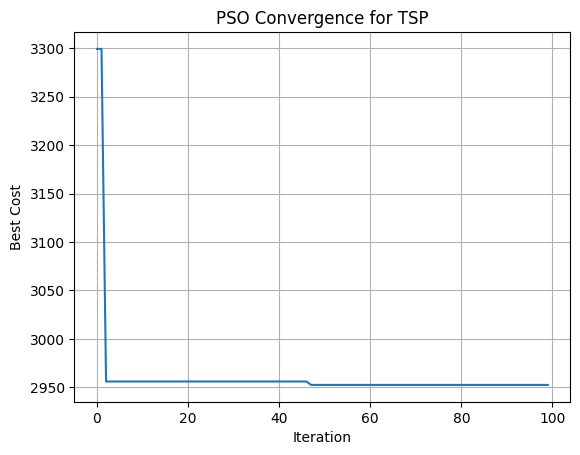

Best Route: [2 7 9 6 1 0 3 8 4 5]
Best Cost: 2846.2973403142364


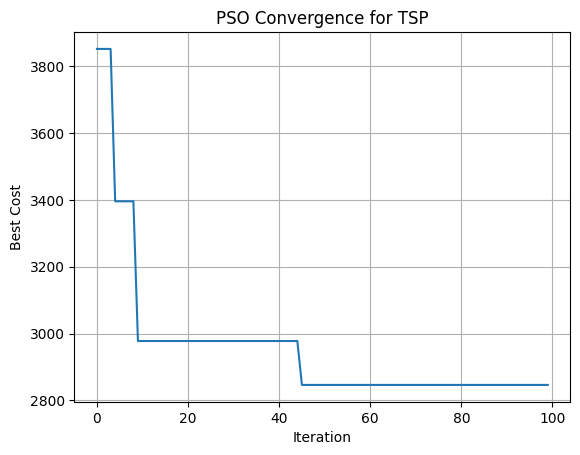

Best Route: [5 9 6 0 3 1 8 4 2 7]
Best Cost: 3060.603985269992


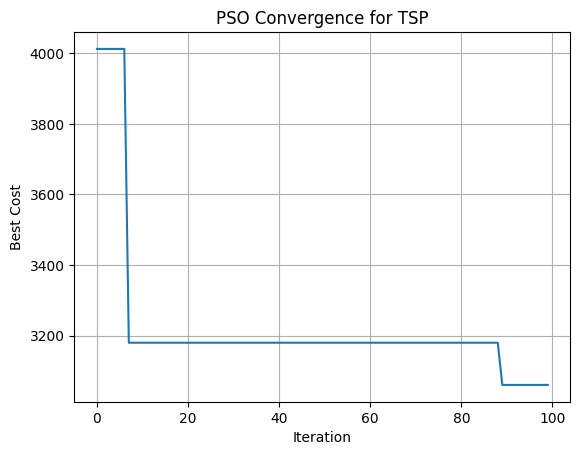

Best Route: [3 1 0 6 9 5 7 2 4 8]
Best Cost: 2996.9673416809983


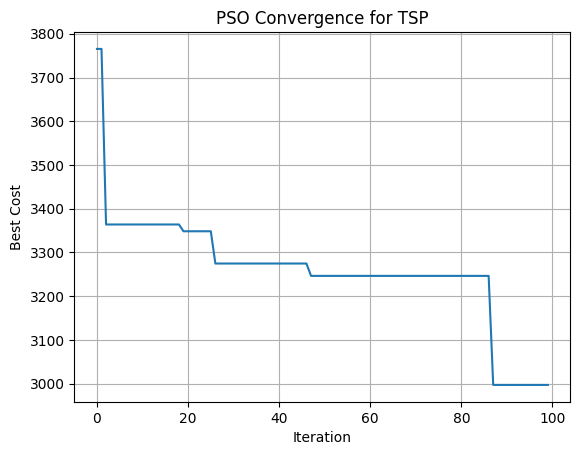

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c1=1)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [2 5 9 0 1 3 6 8 4 7]
Best Cost: 2995.1998676141807


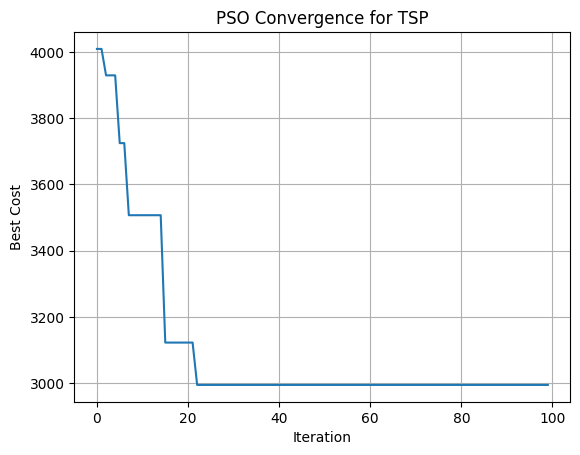

Best Route: [5 4 2 7 8 0 3 1 6 9]
Best Cost: 3127.43612541506


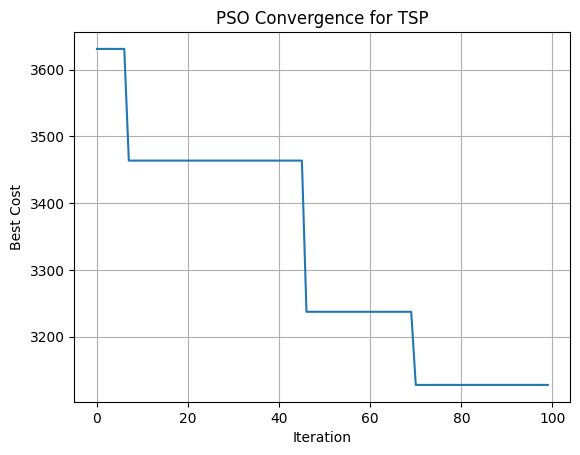

Best Route: [6 9 7 2 5 4 8 3 0 1]
Best Cost: 2846.2973403142364


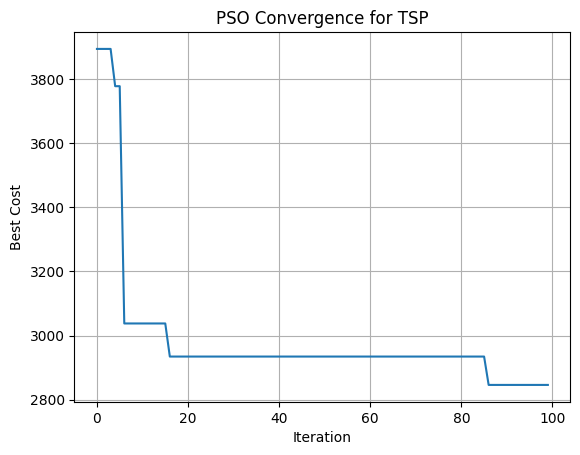

Best Route: [2 4 5 8 6 3 1 0 9 7]
Best Cost: 2995.215258556188


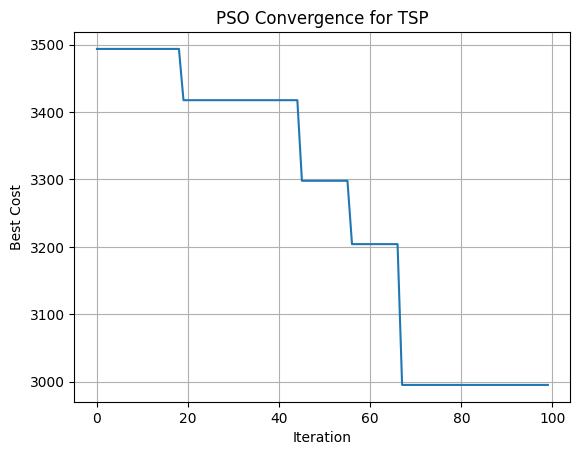

Best Route: [2 4 9 8 6 3 0 1 5 7]
Best Cost: 2895.1712117763695


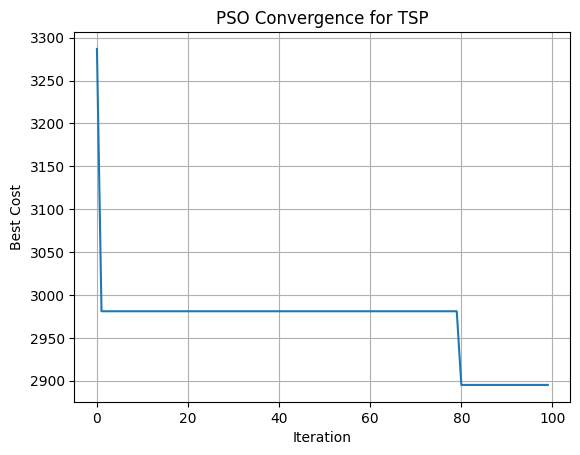

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c1=0.5)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [7 5 9 6 3 0 1 8 4 2]
Best Cost: 2883.3076206278242


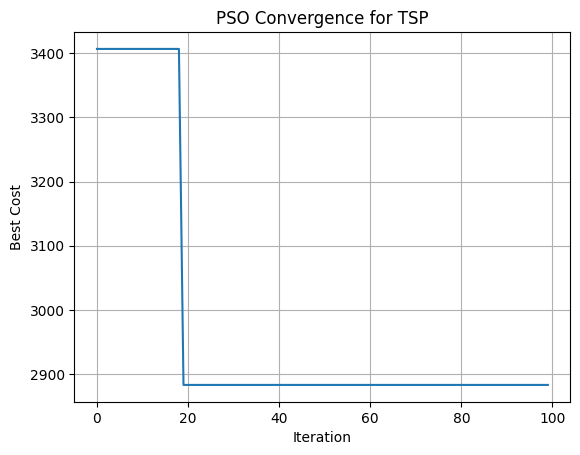

Best Route: [0 1 6 8 2 7 5 4 9 3]
Best Cost: 2894.540942704996


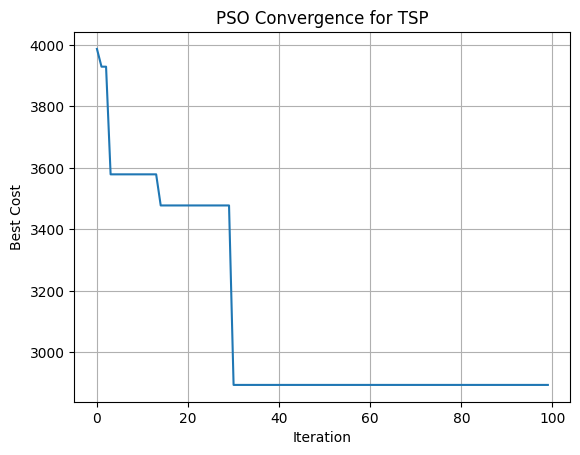

Best Route: [8 4 9 5 7 2 6 1 0 3]
Best Cost: 3301.9402419515195


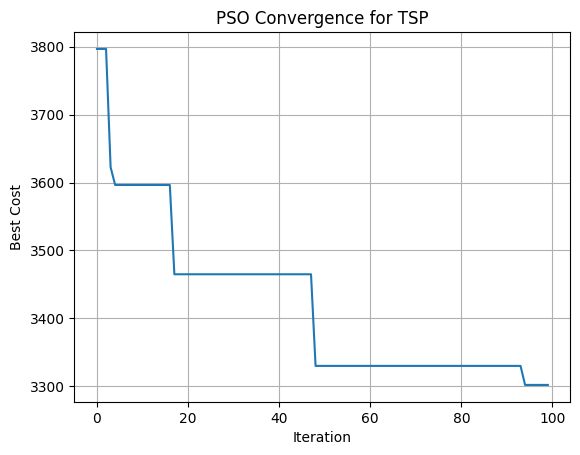

Best Route: [3 6 4 5 2 7 9 8 0 1]
Best Cost: 2973.925015242826


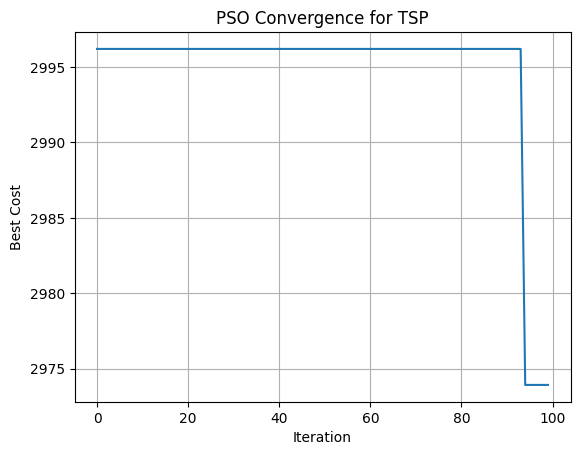

Best Route: [4 8 6 1 0 3 9 7 2 5]
Best Cost: 2821.893373380563


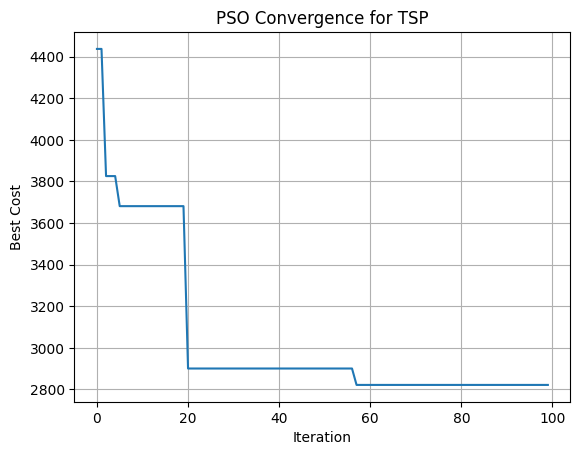

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c1=2)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [3 6 8 9 7 4 5 2 1 0]
Best Cost: 3080.4605480914547


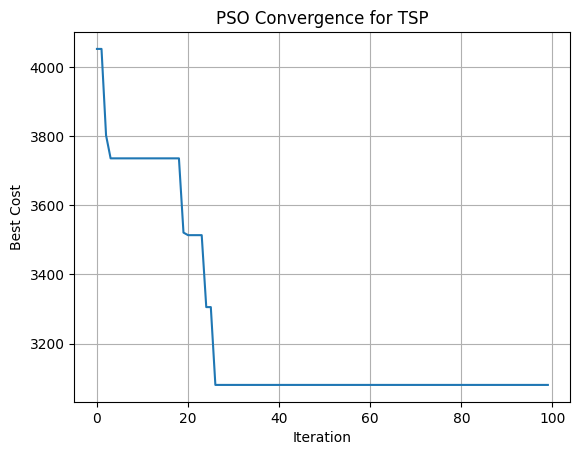

Best Route: [5 7 4 9 8 6 1 3 0 2]
Best Cost: 3282.384959742933


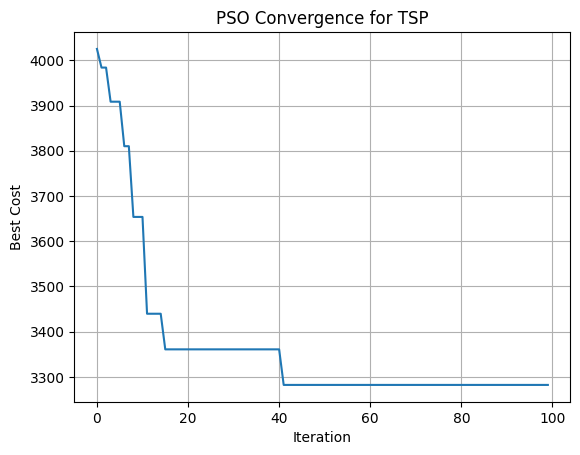

Best Route: [4 9 8 3 0 1 6 7 2 5]
Best Cost: 2957.4890816443058


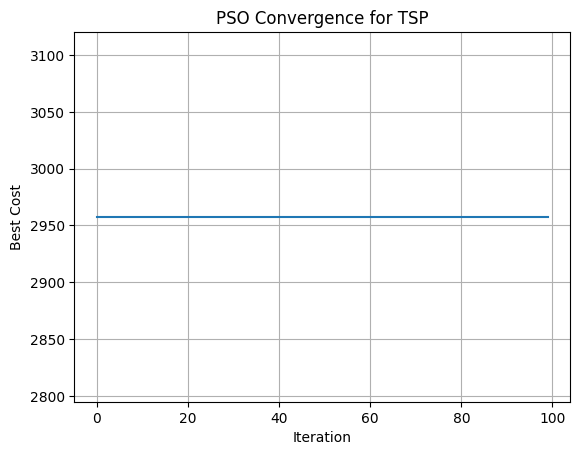

Best Route: [6 1 0 3 9 7 2 4 5 8]
Best Cost: 2879.8879331328944


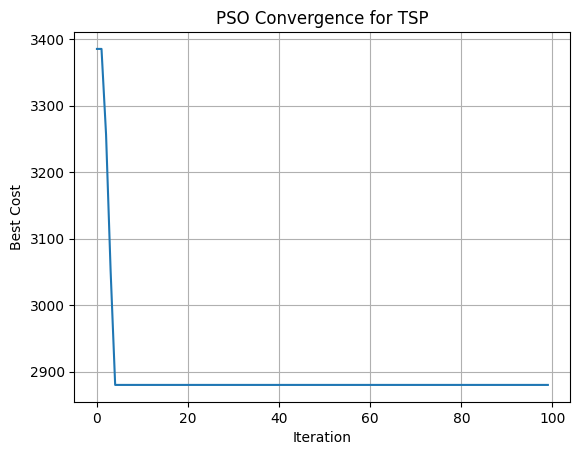

Best Route: [9 7 5 2 4 6 3 0 1 8]
Best Cost: 3088.9094372086347


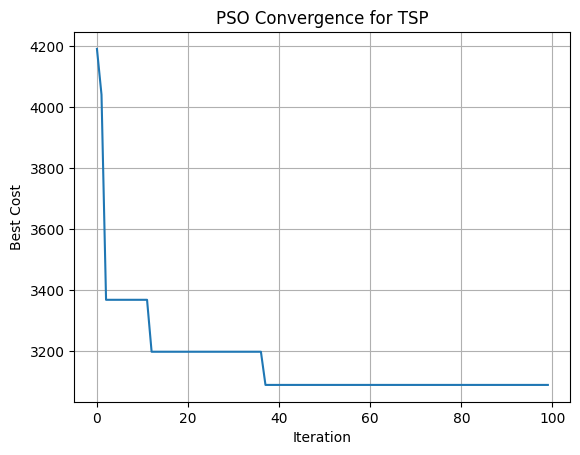

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c1=0.5)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [2 4 8 6 3 0 1 9 5 7]
Best Cost: 2898.2137940197053


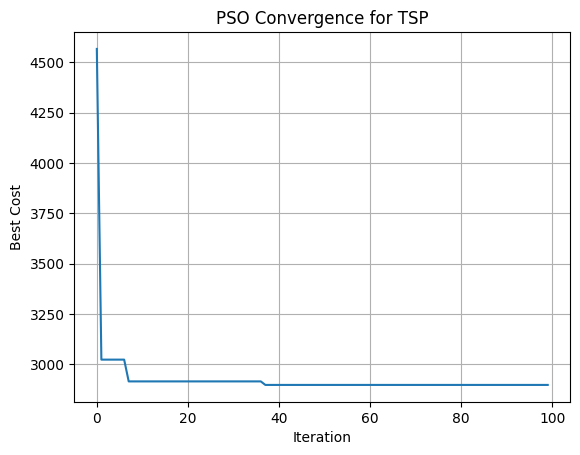

Best Route: [8 0 1 3 6 5 4 7 2 9]
Best Cost: 3083.873647358884


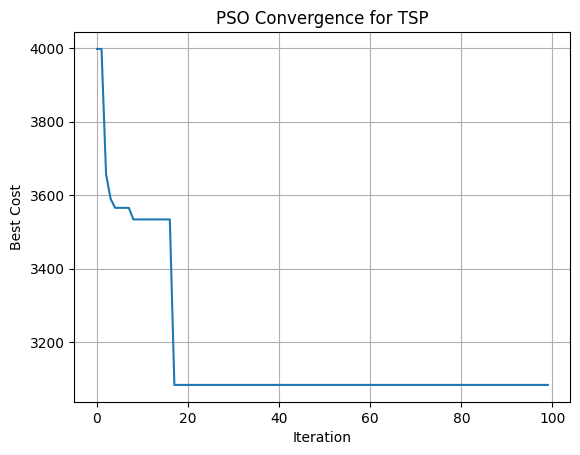

Best Route: [6 0 1 3 8 9 7 4 5 2]
Best Cost: 3263.5529009180077


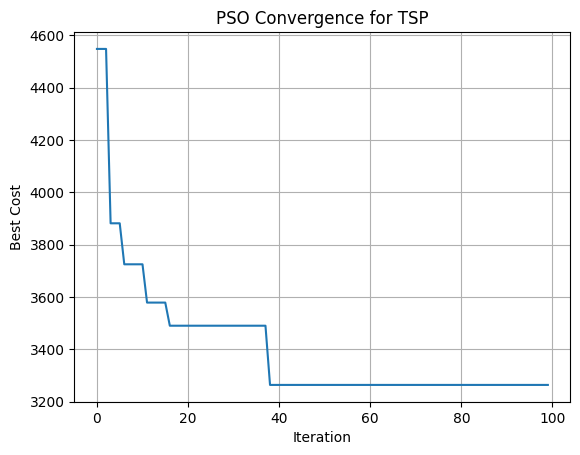

Best Route: [3 6 9 5 7 2 4 8 0 1]
Best Cost: 2990.980966931379


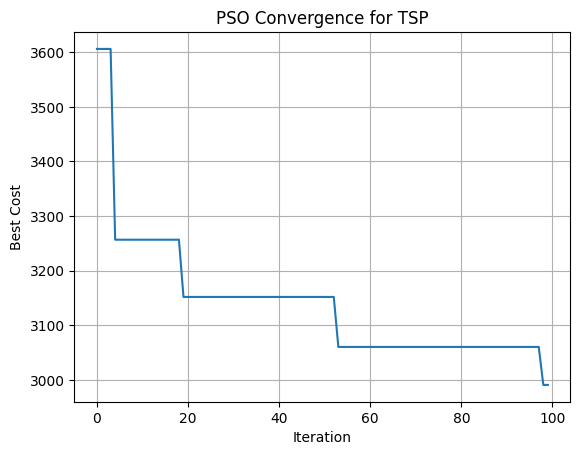

Best Route: [7 5 6 0 3 1 8 9 4 2]
Best Cost: 3115.5539596476992


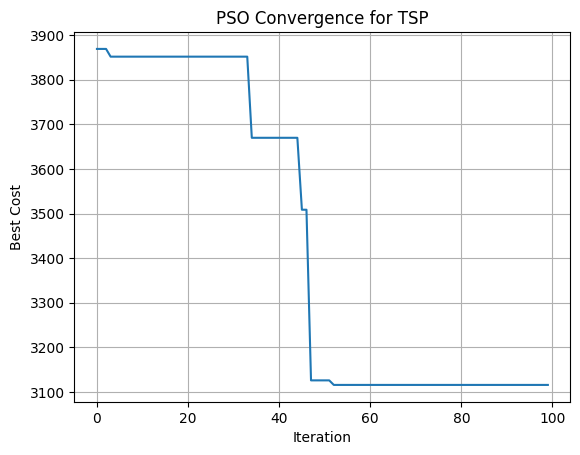

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c2=0.5)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [5 2 4 9 0 1 3 6 8 7]
Best Cost: 3229.434825625684


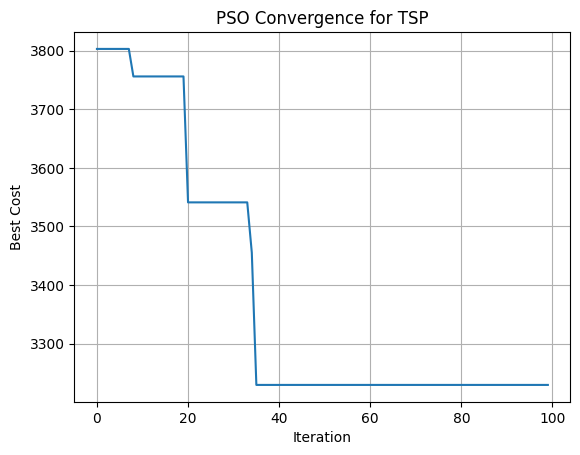

Best Route: [4 7 2 5 6 1 0 3 8 9]
Best Cost: 2959.226483502268


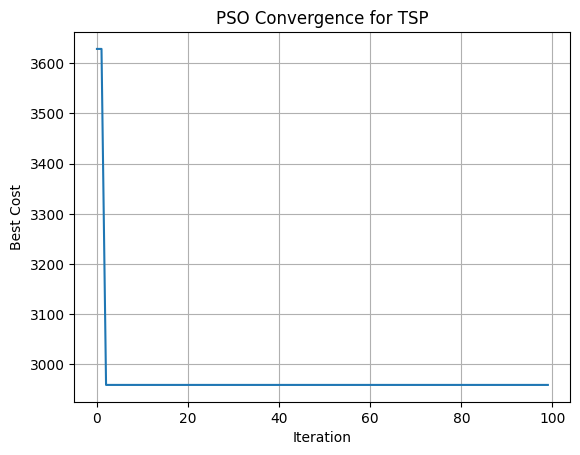

Best Route: [5 8 6 1 3 0 9 2 7 4]
Best Cost: 3123.6554646763498


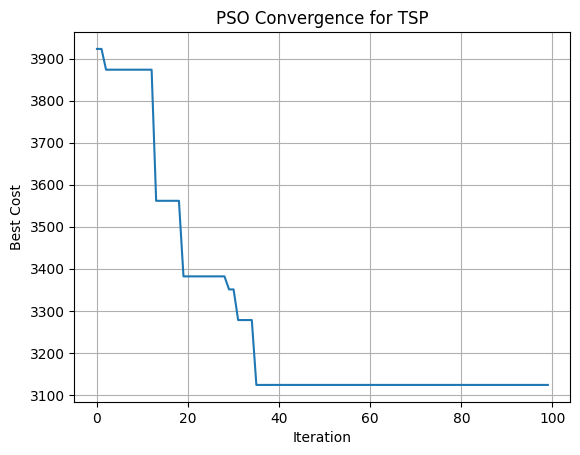

Best Route: [2 5 9 8 3 1 0 6 4 7]
Best Cost: 3037.890558802769


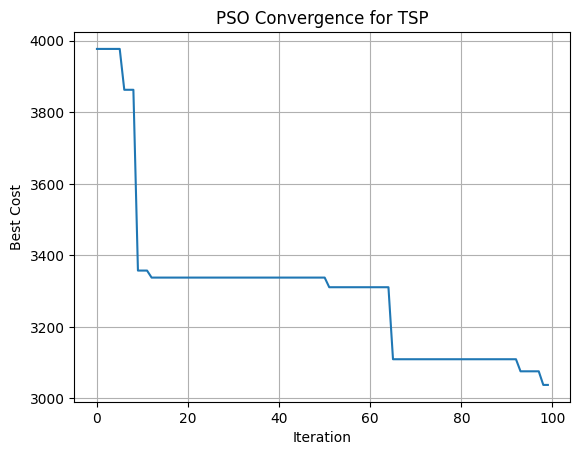

Best Route: [0 1 3 6 7 2 5 4 9 8]
Best Cost: 3050.1009215360637


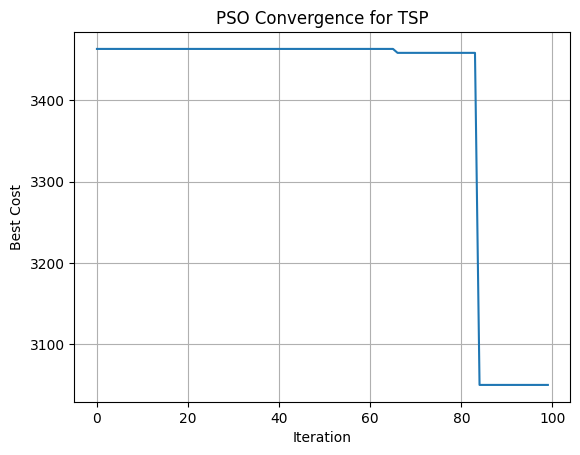

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c2=1)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()

Best Route: [8 4 9 7 2 5 1 0 3 6]
Best Cost: 3196.850781010604


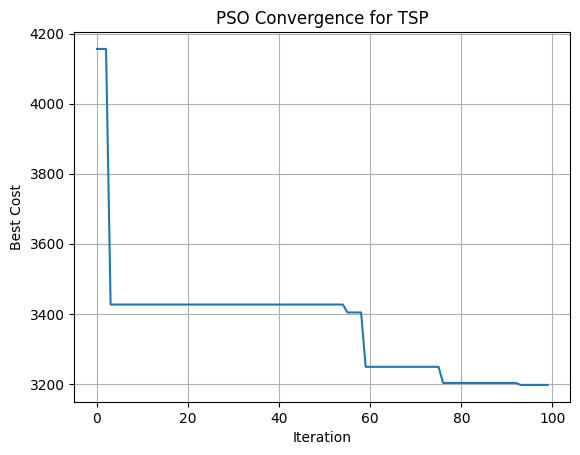

Best Route: [6 8 2 7 5 4 9 0 1 3]
Best Cost: 3009.8682681282894


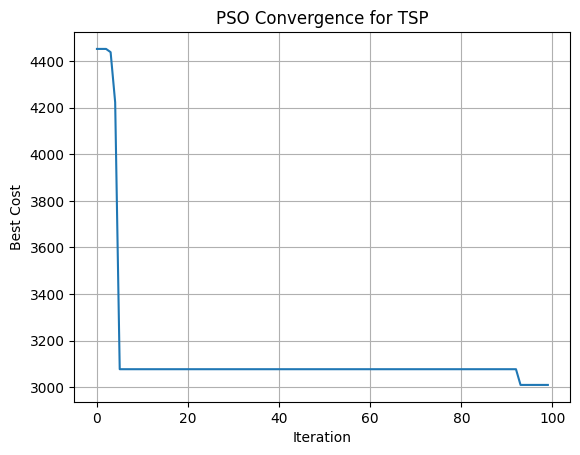

Best Route: [7 5 4 9 6 3 0 1 8 2]
Best Cost: 2903.883403226872


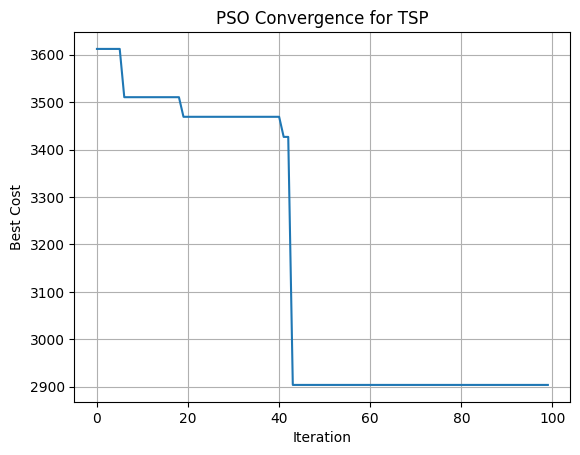

Best Route: [0 3 6 8 9 2 7 5 4 1]
Best Cost: 2866.002762296906


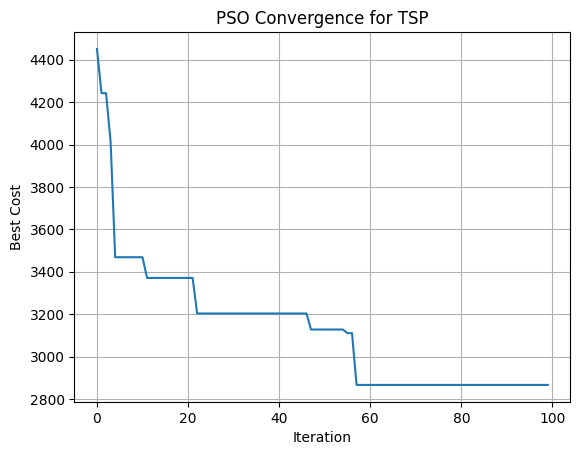

Best Route: [8 2 7 5 4 3 1 0 6 9]
Best Cost: 3159.035777299661


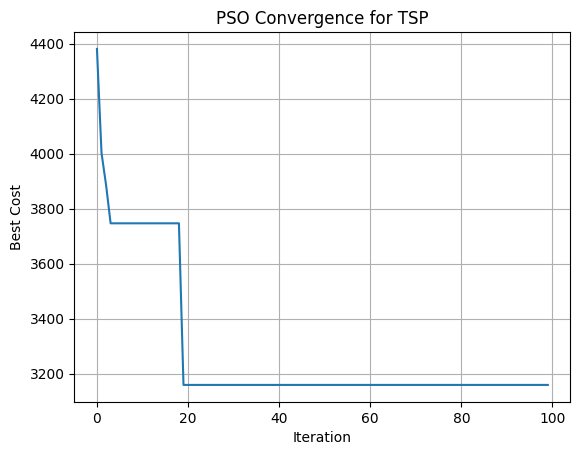

In [ ]:
for _ in range(5):
  best_route, best_cost, convergence = pso_tsp(djib_subset, c2=2)
  print("Best Route:", best_route)
  print("Best Cost:", best_cost)
  plt.plot(convergence)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('PSO Convergence for TSP')
  plt.grid()
  plt.show()